In [ ]:
# PCA was performed, followed by clustering and drawing UMAP.
# Further Genes of interest were analysed for a raw summary.

In [1]:
# =============================================
# Zebrafish Fin Regeneration - Clustering & UMAP
# =============================================

import scanpy as sc
import matplotlib.pyplot as plt

# Load merged dataset
adata = sc.read("merged_regeneration_data.h5ad")
print(f"✅ Loaded dataset: {adata.n_obs} cells | {adata.n_vars} genes")


✅ Loaded dataset: 57594 cells | 8907 genes



📊 Running PCA...


C:\Users\uer\AppData\Local\Temp\ipykernel_14268\1902211471.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


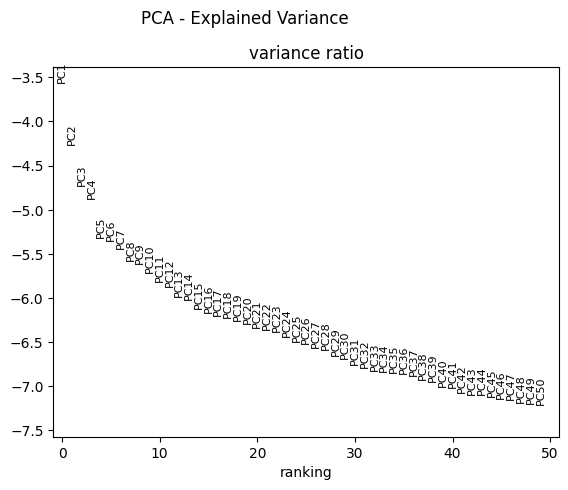

In [2]:
# =============================================
# 1️⃣ PCA (Dimensionality Reduction)
# =============================================
print("\n📊 Running PCA...")
sc.tl.pca(adata, svd_solver='arpack')

# Visualize explained variance
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50, show=False)
plt.suptitle("PCA - Explained Variance", y=1.02)
plt.tight_layout()
plt.show()



🔗 Computing Nearest Neighbors...

🔬 Performing Leiden Clustering...

📉 Calculating UMAP Embedding...


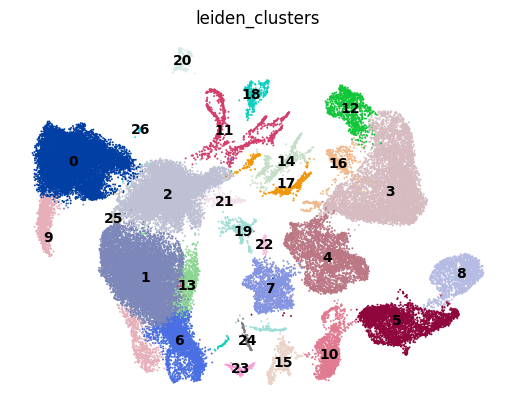

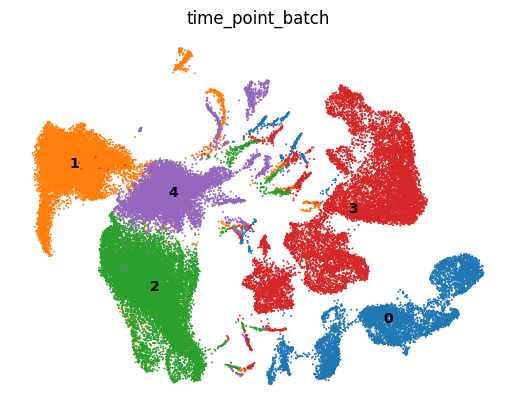

In [4]:
# =============================================
# 2️⃣ Neighbors Graph (For Clustering & UMAP)
# =============================================
print("\n🔗 Computing Nearest Neighbors...")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)

# =============================================
# 3️⃣ Clustering (Leiden Algorithm)
# =============================================
print("\n🔬 Performing Leiden Clustering...")
sc.tl.leiden(adata, resolution=0.6, key_added="leiden_clusters")

# =============================================
# 4️⃣ UMAP Embedding (2D Visualization)
# =============================================
print("\n📉 Calculating UMAP Embedding...")
sc.tl.umap(adata)

# Plot UMAP colored by Leiden clusters
sc.pl.umap(adata, color=["leiden_clusters"], size=8, legend_loc="on data", frameon=False)

# Plot UMAP colored by time points
sc.pl.umap(adata, color=["time_point_batch"], size=8, legend_loc="on data", frameon=False)

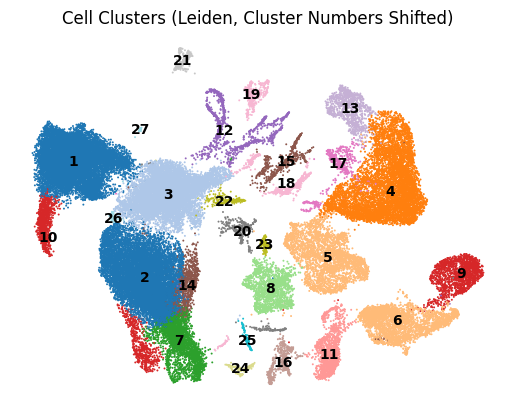

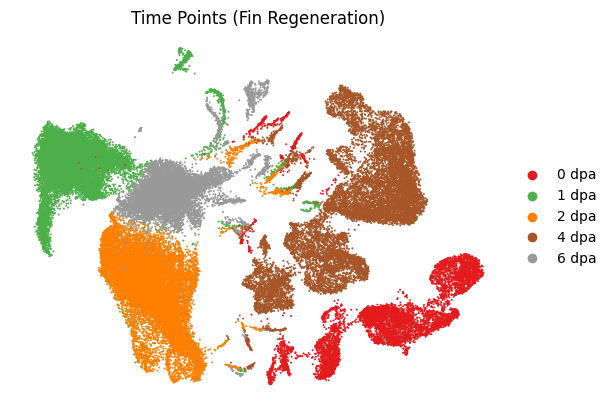

In [7]:
# 📊 Visualization: Cleaned UMAPs with Clear Cluster Numbers & Time Point Labels

import matplotlib.pyplot as plt
import scanpy as sc

# Shift cluster numbers (+1) for easier interpretation
adata.obs['leiden_clusters_shifted'] = (
    adata.obs['leiden_clusters'].astype(int) + 1
).astype(str)  # Ensure string for plotting

# Map time point numbers to actual stage labels
time_point_mapping = {
    '0': '0 dpa',
    '1': '1 dpa',
    '2': '2 dpa',
    '3': '4 dpa',
    '4': '6 dpa'
}

adata.obs['time_point_label'] = adata.obs['time_point_batch'].astype(str).map(time_point_mapping)

# =========================================
# UMAP 1: Clusters (Shifted to start from 1)
# =========================================
sc.pl.umap(
    adata,
    color='leiden_clusters_shifted',
    palette='tab20',  # Colorblind-friendly palette
    legend_fontsize=10,
    frameon=False,
    size=8,
    title='Cell Clusters (Leiden, Cluster Numbers Shifted)',
    legend_loc='on data',
    edgecolor='none'
)
plt.savefig("umap_leiden_clusters.png", dpi=300, bbox_inches='tight')  # High-res save

# =========================================
# UMAP 2: Time Points with Clear Labels
# =========================================
sc.pl.umap(
    adata,
    color='time_point_label',
    palette='Set1',
    legend_fontsize=10,
    frameon=False,
    size=8,
    title='Time Points (Fin Regeneration)',
    legend_loc='right margin',
    edgecolor='none'
)
plt.savefig("umap_timepoints.png", dpi=300, bbox_inches='tight')

In [ ]:
# We visualized the spatial expression patterns of RNA Polymerase I-related genes (taf1b, rrn3, polr1d, sprtn) across the UMAP projection 
# of regenerating fin cells. This highlights which clusters and time points are enriched for these genes.

Genes found in dataset: ['taf1b', 'rrn3', 'polr1d', 'sprtn', 'klf4', 'col1a1a']


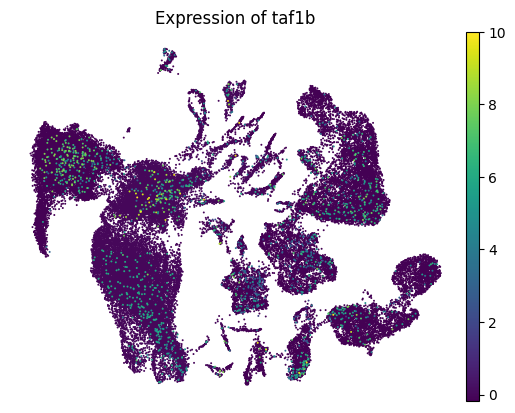

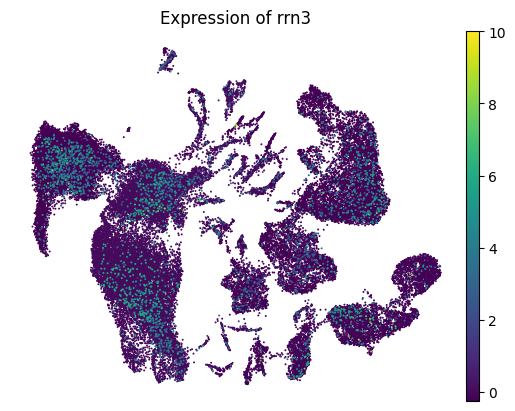

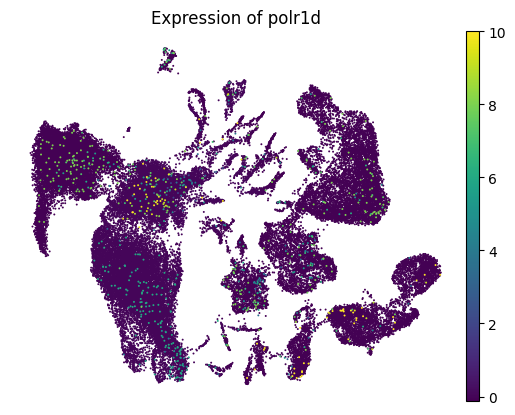

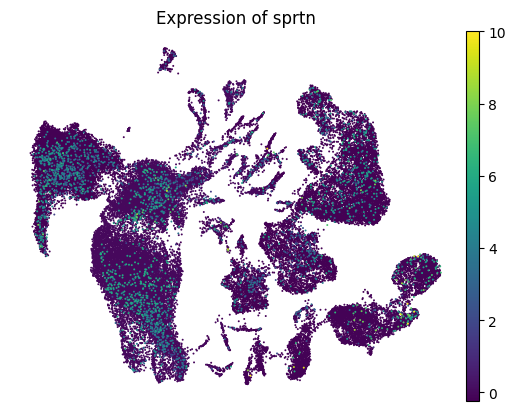

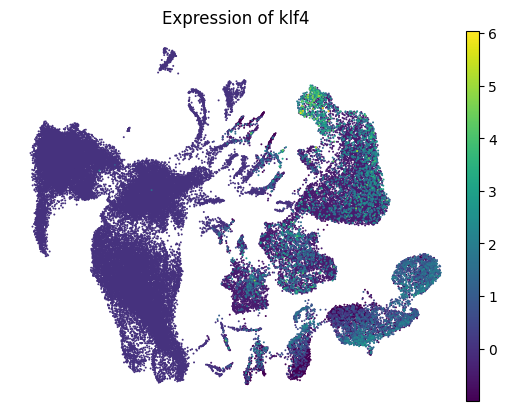

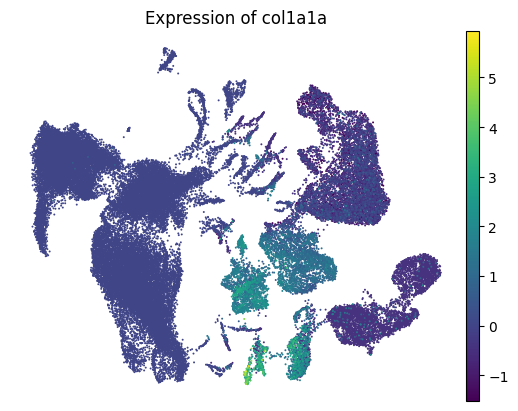

In [12]:
# 🎯 Visualize expression of key RNA Pol I-related genes
genes_of_interest = ['taf1b', 'rrn3', 'polr1d', 'sprtn','klf4','col1a1a']

# First, check which genes are available in the dataset
present_genes = [gene for gene in genes_of_interest if gene in adata.var_names]

print("Genes found in dataset:", present_genes)

# Plot UMAPs with gene expression overlay (only for present genes)
for gene in present_genes:
    sc.pl.umap(
        adata,
        color=gene,
        cmap='viridis',  # Good for expression gradients
        frameon=False,
        size=8,
        title=f'Expression of {gene}',
        edgecolor='none'
    )
    plt.savefig(f"umap_expression_{gene}.png", dpi=300, bbox_inches='tight')
    

In [15]:
# =============================================
# 💾 Save Updated Dataset (with PCA, Clusters, UMAP)
# =============================================
adata.write("merged_regeneration_data_clustered.h5ad", compression="gzip")
print("💾 Saved clustered dataset: merged_regeneration_data_clustered.h5ad")

💾 Saved clustered dataset: merged_regeneration_data_clustered.h5ad
